In [1]:
import cv2
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
from img_util import imshow
import skimage as ski


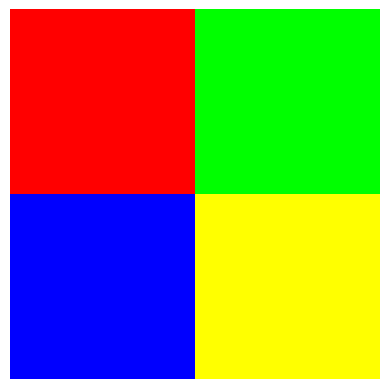

In [2]:
img=cv2.imread('download.png')
imshow(img[:,:,::-1],'')

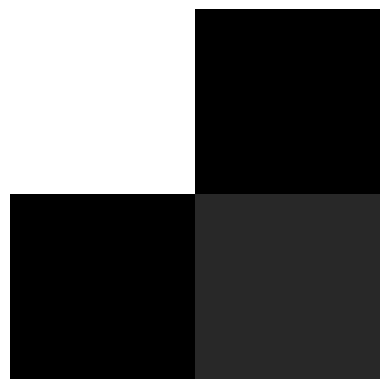

In [3]:
red_img=cv2.subtract(img[:,:,-1],cv2.cvtColor(img,cv2.COLOR_BGR2GRAY))
imshow(red_img,'','gray')

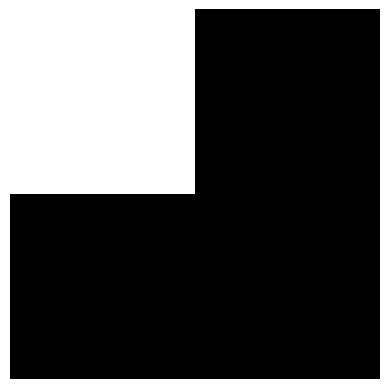

In [4]:
_,red_bw=cv2.threshold(red_img,60,255,cv2.THRESH_BINARY)
imshow(red_bw,'','gray')

In [5]:
strel=cv2.getStructuringElement(cv2.MORPH_RECT,(10,10))
strel

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=uint8)

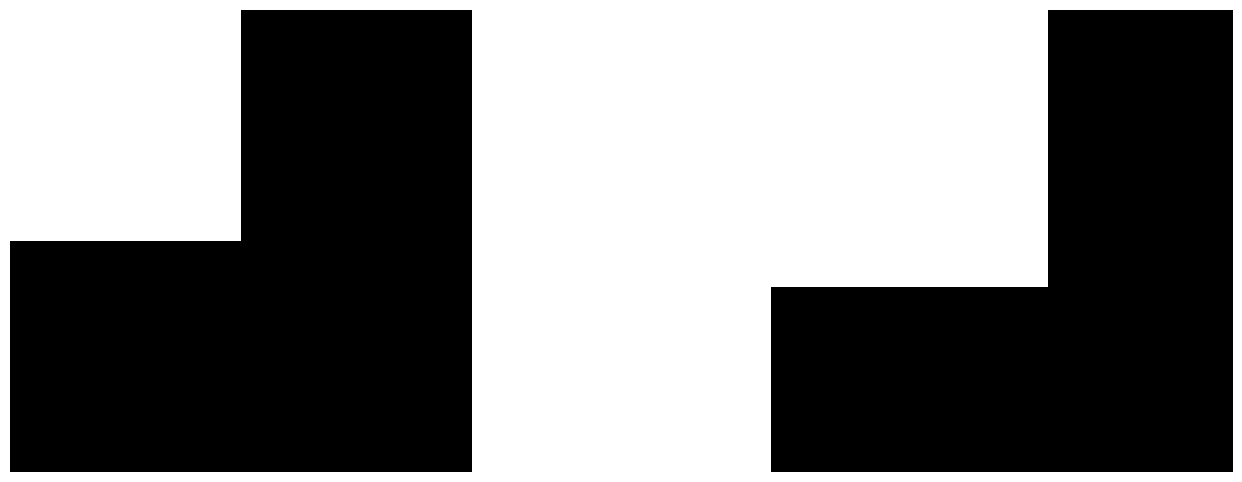

In [6]:
plt.figure(figsize=(18,6))
plt.subplot(121)
imshow(red_bw,'','gray')
plt.subplot(122)

red_dilate=cv2.dilate(red_bw,strel)
imshow(red_dilate,'','gray')

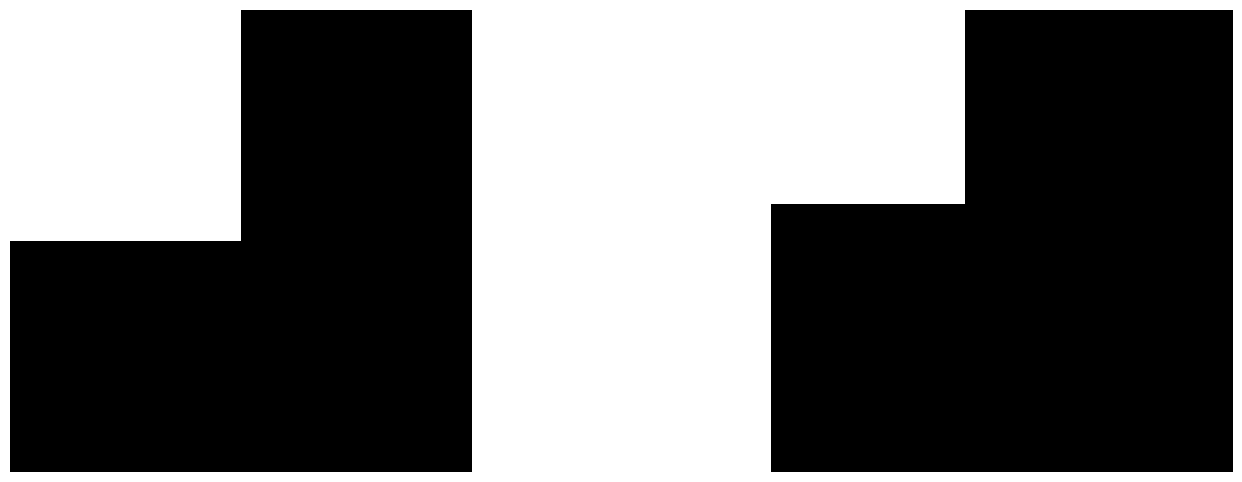

In [7]:
plt.figure(figsize=(18,6))
plt.subplot(121)
imshow(red_bw,'','gray')
plt.subplot(122)

red_erode=cv2.erode(red_bw,strel)
imshow(red_erode,'','gray')

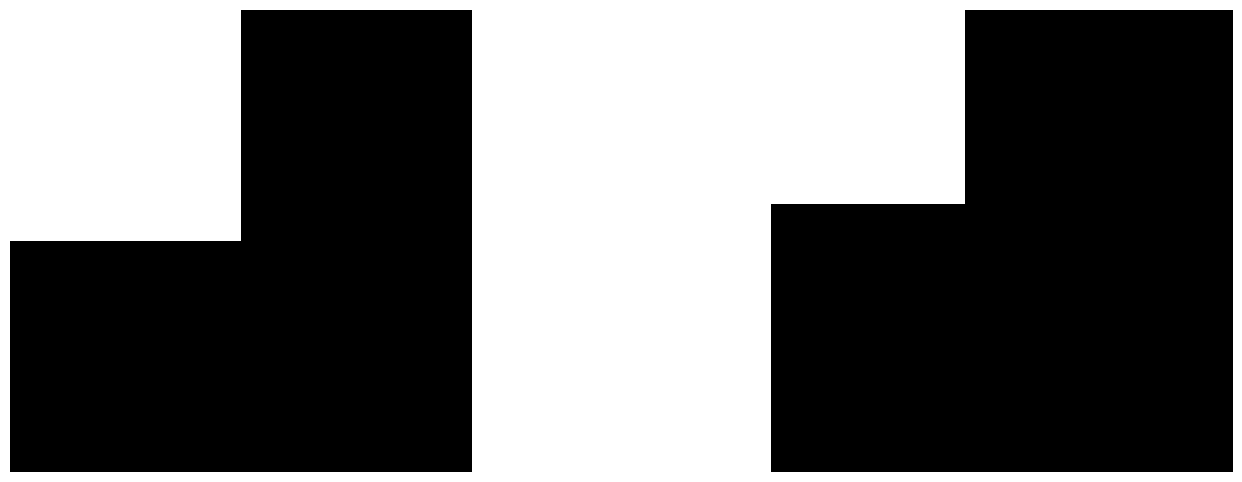

In [8]:
plt.figure(figsize=(18,6))
plt.subplot(121)
imshow(red_bw,'','gray')
plt.subplot(122)

red_open=cv2.morphologyEx(red_bw,cv2.MORPH_OPEN,strel)
imshow(red_erode,'','gray')

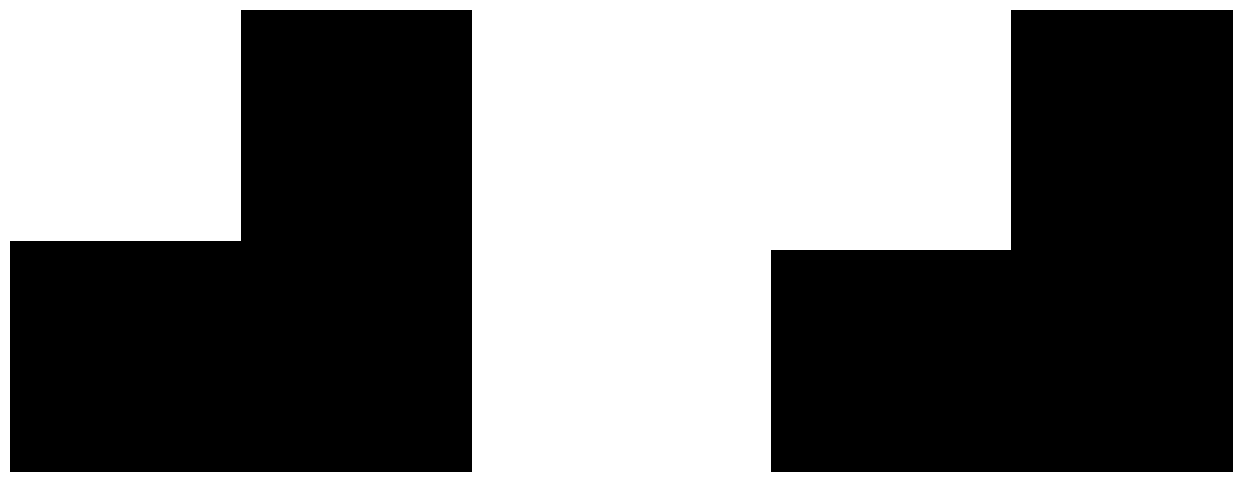

In [9]:
plt.figure(figsize=(18,6))
plt.subplot(121)
imshow(red_bw,'','gray')
plt.subplot(122)

red_close=cv2.morphologyEx(red_bw,cv2.MORPH_OPEN,strel,iterations=1)
imshow(red_close,'','gray')

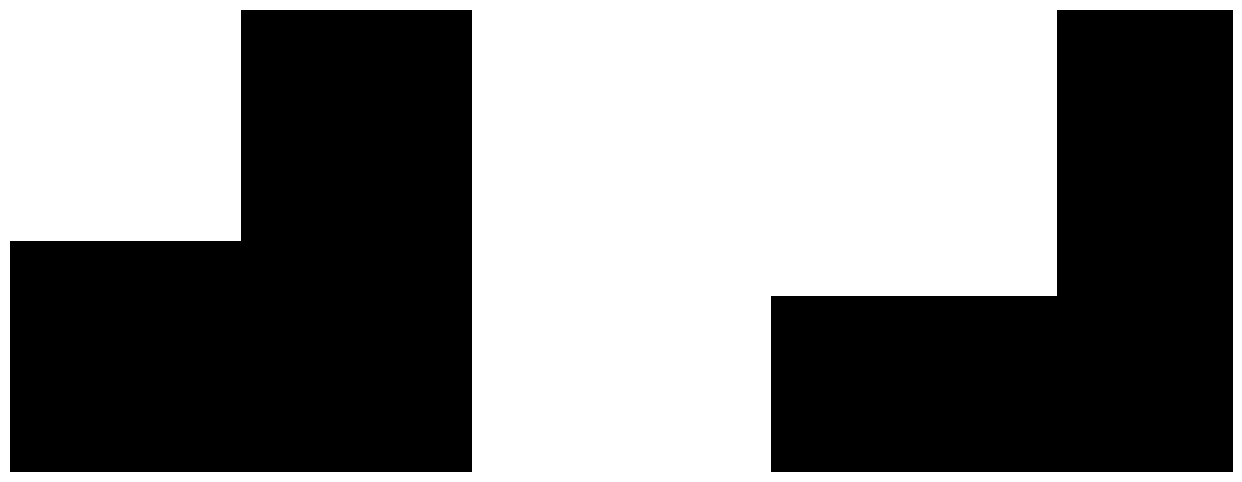

In [10]:
plt.figure(figsize=(18,6))
plt.subplot(121)
imshow(red_bw,'','gray')
plt.subplot(122)

red_close2=cv2.morphologyEx(red_dilate,cv2.MORPH_OPEN,strel,iterations=1)
imshow(red_close2,'','gray')

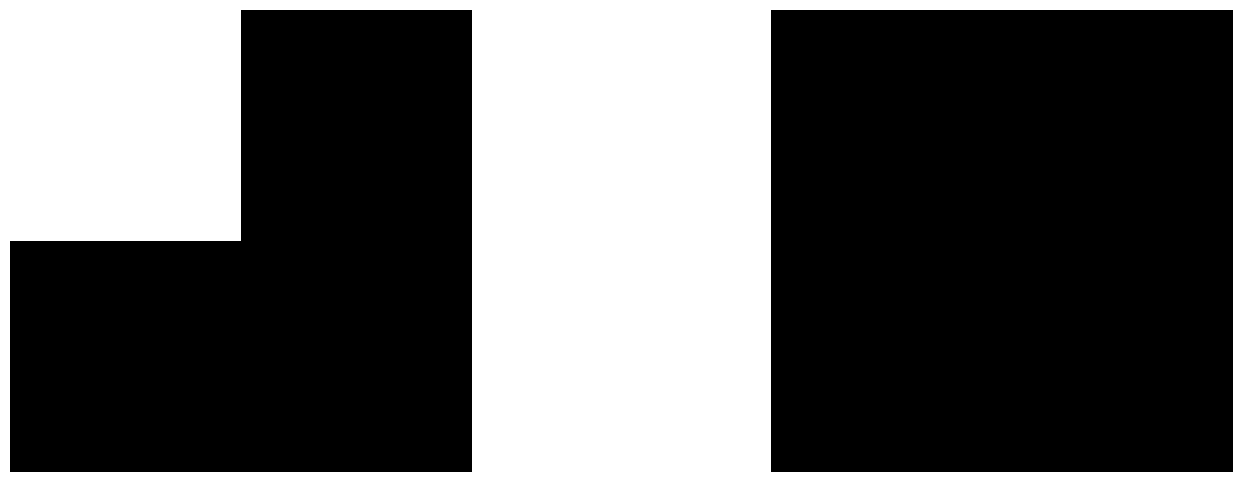

In [11]:
plt.figure(figsize=(18,6))
plt.subplot(121)
imshow(red_bw,'','gray')
plt.subplot(122)

red_close3=ski.morphology.remove_small_objects(red_close2.astype(bool),15000)
imshow(red_close3,'','gray')

In [2]:
import cv2
vid = cv2.VideoCapture(0)
while True:
    ack, img = vid.read()
    if ack:
        th,read_bw=cv2.threshold(cv2.subtract(img[:,:,-1],cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)),40,355,cv2.THRESH_BINARY)
        cv2.imshow('Preview',read_bw)
        key = cv2.waitKey(1)
        if key == ord('x'):
            break
    else:
        print('none')
cv2.destroyAllWindows()
vid.release()

In [7]:
import cv2
vid = cv2.VideoCapture(0)
while True:
    ack, img = vid.read()
    if ack:
        red_img = cv2.subtract(img[:,:,-2], cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))
        _, red_bw = cv2.threshold(red_img, 60, 255, cv2.THRESH_BINARY)
        strel = cv2.getStructuringElement(cv2.MORPH_RECT, (10,20))
        red_dilate = cv2.dilate(red_bw, strel)
        red_close2 = cv2.morphologyEx(red_dilate, cv2.MORPH_OPEN, strel, iterations = 1)
        red_close3 = ski.morphology.remove_small_objects(red_close2.astype(bool),15000)
        rp = ski.measure.regionprops(
            ski.measure.label(
                red_close3.astype('uint8')
            )
        )
        img_copy = img.copy()
        for r in rp:
            y1,x1,y2,x2 = r.bbox 
            cv2.rectangle(img_copy, (x1,y1), (x2,y2), color=[255,0,0], thickness=5)
        count = str(len(rp))
        cv2.putText(
            img_copy, count, (img_copy.shape[1]-200, 150),
            cv2.FONT_HERSHEY_PLAIN, 7, (255,0,0),thickness=10
        )
        cv2.imshow('Preview',img_copy)
        key = cv2.waitKey(1)
        if key == ord('x'):
            break
        
cv2.destroyAllWindows()
vid.release()

In [6]:
vid = cv2.VideoCapture(0)  # write 0 here
while True:
    ack, img = vid.read()
    if ack:
        red_img = cv2.subtract(
            img[:,:,-1], cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        )
        _, red_bw = cv2.threshold(red_img, 60,255, cv2.THRESH_BINARY)
        strel = cv2.getStructuringElement(cv2.MORPH_RECT, (10,10))
        red_dilate = cv2.dilate(red_bw, strel)
        red_close2 = cv2.morphologyEx(
            red_dilate, cv2.MORPH_OPEN, strel, iterations=1
        )
        red_close3 = ski.morphology.remove_small_objects(
            red_close2.astype(bool), 15000
        )
        rp = ski.measure.regionprops(
            ski.measure.label(red_close3.astype('uint8'))
        )
        img_copy = img.copy()
        for r in rp:
            y1,x1,y2,x2 = r.bbox
            cv2.rectangle(img_copy, (x1,y1),(x2,y2), color=[255,0,0],thickness=5)
        count = str(len(rp))
        cv2.putText(
            img_copy, count, (img_copy.shape[1]-200,150), 
            cv2.FONT_HERSHEY_PLAIN, 7,(0,0,255),thickness=10
        )
        
        cv2.imshow('Preview',img_copy)
        key = cv2.waitKey(1)
        if key == ord('x'):
            break
cv2.destroyAllWindows()
cv2.waitKey(1)   # do not write this step
vid.release()

In [2]:
import cv2
fd = cv2.CascadeClassifier(
    cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
    )
vid = cv2.VideoCapture(0)
while True:
    ack, img = vid.read()
    if ack:
        faces = fd.detectMultiScale(img)
        for x,y,w,h in faces:
            cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,255),10)
        cv2.imshow('Preview',img)
        key = cv2.waitKey(1)
        if key == ord('x'):
            break
    else:
        print('none')
cv2.destroyAllWindows(); cv2.waitKey(1)
vid.release()

In [14]:
import cv2
fd = cv2.CascadeClassifier(
    cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
    )
vid = cv2.VideoCapture(0)
counter = 0
while True:
    ack, img = vid.read()
    if ack:
        faces = fd.detectMultiScale(img)
        if len(faces) == 1:
            counter += 1
            for x,y,w,h in faces:
               cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,255),10)
            face_img = img[y:y+h, x:x+w, :].copy()
            cv2.imwrite(r'faces/prince/face_{0}.png'.format(counter),face_img)
        cv2.imshow('Preview',img)
        key = cv2.waitKey(1)
        if key == ord('x'):
            break
    else:
        print('none')
cv2.destroyAllWindows(); cv2.waitKey(1)
vid.release()

In [10]:
# Live Image Capturing
import cv2, skimage as ski
vid = cv2.VideoCapture(0)
while True:
    ack, img = vid.read()
    if ack:
        th, red_bw = cv2.threshold(
            cv2.subtract(
                img[:,:,-3], cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            ), 40, 255, cv2.THRESH_BINARY
        )
        strel = cv2.getStructuringElement(cv2.MORPH_RECT, (20,20))
        red_bw = cv2.morphologyEx(
            red_bw, cv2.MORPH_CLOSE, strel, iterations=1
        )
        red_bw = ski.morphology.remove_small_objects(
            red_bw.astype(bool), 3000
        ).astype('uint8') * 255
        red_bw = ski.morphology.remove_small_holes(
            red_bw.astype(bool), 3000
        ).astype('uint8') * 255

        rps = ski.measure.regionprops(
            ski.measure.label(red_bw.astype(bool))
        )
        count = len(rps)
        img_copy = img.copy()
        cv2.putText(img_copy, str(count),(150,150),
                    cv2.FONT_HERSHEY_PLAIN, 10, (255,0,0),10
        )
        for rp in rps:
            y1,x1,y2,x2 = rp.bbox
            cv2.rectangle(img_copy, (x1,y1),(x2,y2),(255,0,0),thickness=5)

        cv2.imshow('Preview', img_copy)  # depends on requirement
        key = cv2.waitKey(1)
        if key == ord('x'):
            break
cv2.destroyAllWindows(); cv2.waitKey(1)
vid.release()